In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier

In [24]:
df = pd.read_csv('datasets/indian_engineering_student_placement.csv')
df.head(10)

,Student_ID,gender,branch,cgpa,tenth_percentage,twelfth_percentage,backlogs,study_hours_per_day,attendance_percentage,projects_completed,...,aptitude_skill_rating,hackathons_participated,certifications_count,sleep_hours,stress_level,part_time_job,family_income_level,city_tier,internet_access,extracurricular_involvement
0,1,Male,ECE,8.74,74.0,75.0,0,3.8,71.1,7,...,5,4,5,6.5,8,Yes,Medium,Tier 2,Yes,Medium
1,2,Female,ECE,7.80,75.3,69.7,0,6.3,69.5,5,...,3,4,1,7.1,8,Yes,Medium,Tier 3,Yes,Low
2,3,Female,IT,6.95,62.8,68.3,0,1.5,62.5,8,...,4,6,3,6.1,2,No,Low,Tier 2,Yes,High
3,4,Male,ECE,7.46,57.9,51.4,1,4.7,64.6,6,...,4,2,2,7.3,7,No,Medium,Tier 1,Yes,Low
4,5,Male,IT,6.86,61.3,73.5,2,5.2,75.9,3,...,3,2,1,6.0,7,No,Medium,Tier 1,Yes,Medium
5,6,Male,CSE,7.46,70.5,70.4,3,3.6,81.7,5,...,4,2,2,8.8,10,Yes,High,Tier 1,Yes,Medium
6,7,Male,CE,8.26,81.2,74.8,0,1.8,59.6,4,...,3,4,4,5.7,8,No,Low,Tier 1,No,High
7,8,Female,IT,7.01,63.9,61.2,0,2.4,64.7,7,...,4,4,5,4.2,10,No,Medium,Tier 2,Yes,Low
8,9,Female,CSE,7.97,71.4,73.8,1,7.6,75.5,7,...,4,5,7,5.4,10,No,Medium,Tier 2,Yes,Medium
9,10,Female,ECE,8.79,70.1,77.1,0,5.9,77.2,7,...,4,4,3,7.5,10,Yes,Medium,Tier 1,Yes,Low


In [25]:
df2=pd.read_csv('datasets/placement_targets.csv')
df2.head(10)

,Student_ID,placement_status,salary_lpa
0,1,Placed,14.95
1,2,Placed,14.91
2,3,Placed,17.73
3,4,Placed,14.52
4,5,Placed,15.91
5,6,Placed,14.27
6,7,Placed,10.97
7,8,Placed,13.41
8,9,Placed,18.83
9,10,Placed,17.66


In [26]:
df['placement_status'] = df2['placement_status']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Student_ID                   5000 non-null   int64  
 1   gender                       5000 non-null   object 
 2   branch                       5000 non-null   object 
 3   cgpa                         5000 non-null   float64
 4   tenth_percentage             5000 non-null   float64
 5   twelfth_percentage           5000 non-null   float64
 6   backlogs                     5000 non-null   int64  
 7   study_hours_per_day          5000 non-null   float64
 8   attendance_percentage        5000 non-null   float64
 9   projects_completed           5000 non-null   int64  
 10  internships_completed        5000 non-null   int64  
 11  coding_skill_rating          5000 non-null   int64  
 12  communication_skill_rating   5000 non-null   int64  
 13  aptitude_skill_rat

In [27]:
df.drop(columns=['Student_ID'], inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       5000 non-null   object 
 1   branch                       5000 non-null   object 
 2   cgpa                         5000 non-null   float64
 3   tenth_percentage             5000 non-null   float64
 4   twelfth_percentage           5000 non-null   float64
 5   backlogs                     5000 non-null   int64  
 6   study_hours_per_day          5000 non-null   float64
 7   attendance_percentage        5000 non-null   float64
 8   projects_completed           5000 non-null   int64  
 9   internships_completed        5000 non-null   int64  
 10  coding_skill_rating          5000 non-null   int64  
 11  communication_skill_rating   5000 non-null   int64  
 12  aptitude_skill_rating        5000 non-null   int64  
 13  hackathons_partici

In [28]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.shape, y.shape

((5000, 22), (5000,))


CLASS DISTRIBUTION ANALYSIS

📊 CLASS COUNTS:
placement_status
Placed        4303
Not Placed     697
Name: count, dtype: int64

📈 CLASS PROPORTIONS:
   Placed: 86.06%
   Not Placed: 13.94%

⚠️  IMBALANCE RATIO:
   Ratio: 1:6.17
   ⚠️  IMBALANCED! Consider using SMOTE


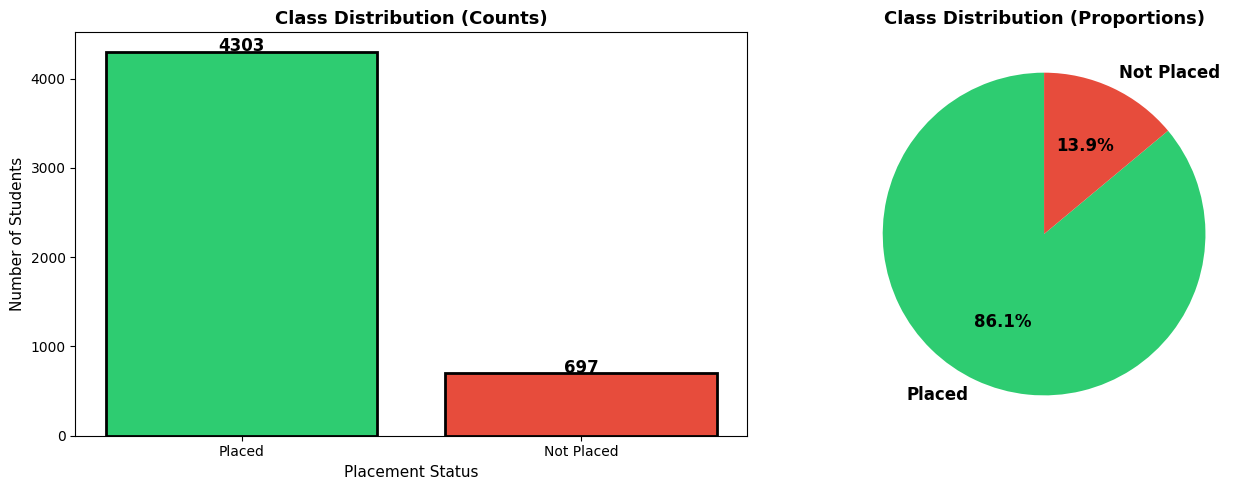

In [29]:
# CHECK CLASS DISTRIBUTION (IMBALANCE ANALYSIS)
print("\n" + "=" * 80)
print("CLASS DISTRIBUTION ANALYSIS")
print("=" * 80)

print("\n📊 CLASS COUNTS:")
class_counts = y.value_counts()
print(class_counts)

print("\n📈 CLASS PROPORTIONS:")
class_proportions = y.value_counts(normalize=True) * 100
for cls, prop in class_proportions.items():
    print(f"   {cls}: {prop:.2f}%")

print("\n⚠️  IMBALANCE RATIO:")
placed_count = class_counts.get('Placed', 0)
not_placed_count = class_counts.get('Not Placed', 0)
if placed_count > 0 and not_placed_count > 0:
    ratio = max(placed_count, not_placed_count) / min(placed_count, not_placed_count)
    print(f"   Ratio: 1:{ratio:.2f}")
    if ratio > 1.5:
        print(f"   ⚠️  IMBALANCED! Consider using SMOTE")
    else:
        print(f"   ✓ Relatively BALANCED")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
colors = ['#2ecc71', '#e74c3c']
axes[0].bar(class_counts.index, class_counts.values, color=colors, edgecolor='black', linewidth=2)
axes[0].set_title('Class Distribution (Counts)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Number of Students', fontsize=11)
axes[0].set_xlabel('Placement Status', fontsize=11)
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold', fontsize=12)

# Pie chart
axes[1].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Class Distribution (Proportions)', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)


In [30]:
numerical_features = [feat for feat in X.columns if df[feat].dtype != 'O']
categorical_features = [feat for feat in X.columns if df[feat].dtype == 'O']

print("Numerical Features:")
print(numerical_features)
print("\nCategorical Features:")
print(categorical_features)

Numerical Features:
['cgpa', 'tenth_percentage', 'twelfth_percentage', 'backlogs', 'study_hours_per_day', 'attendance_percentage', 'projects_completed', 'internships_completed', 'coding_skill_rating', 'communication_skill_rating', 'aptitude_skill_rating', 'hackathons_participated', 'certifications_count', 'sleep_hours', 'stress_level']

Categorical Features:
['gender', 'branch', 'part_time_job', 'family_income_level', 'city_tier', 'internet_access', 'extracurricular_involvement']


In [31]:
for feature in categorical_features:
    print(f"{feature} has uniques of : {df[feature].unique()}")

gender has uniques of : ['Male' 'Female']
branch has uniques of : ['ECE' 'IT' 'CSE' 'CE' 'ME']
part_time_job has uniques of : ['Yes' 'No']
family_income_level has uniques of : ['Medium' 'Low' 'High']
city_tier has uniques of : ['Tier 2' 'Tier 3' 'Tier 1']
internet_access has uniques of : ['Yes' 'No']
extracurricular_involvement has uniques of : ['Medium' 'Low' 'High' nan]


In [32]:
X['extracurricular_involvement'] = X['extracurricular_involvement'].replace({np.nan: np.nan})
X.extracurricular_involvement.unique()

array(['Medium', 'Low', 'High', nan], dtype=object)

In [33]:
## My first work is to encode the categorical_features with ordinal encoder and make the numerical_features standarisation
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
scale = StandardScaler()
ordinal_coder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
preprocessor=ColumnTransformer(
    [
        ("OrdinalEncoder", ordinal_coder, categorical_features),
        ("StandardScaler", scale, numerical_features)
    ]
)
X_transformed = preprocessor.fit_transform(X)

# Get feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()
X = pd.DataFrame(X_transformed, columns=feature_names)
print(f"Shape after preprocessing: {X.shape}")
X.head()


Shape after preprocessing: (5000, 22)


,OrdinalEncoder__gender,OrdinalEncoder__branch,OrdinalEncoder__part_time_job,OrdinalEncoder__family_income_level,OrdinalEncoder__city_tier,OrdinalEncoder__internet_access,OrdinalEncoder__extracurricular_involvement,StandardScaler__cgpa,StandardScaler__tenth_percentage,StandardScaler__twelfth_percentage,...,StandardScaler__attendance_percentage,StandardScaler__projects_completed,StandardScaler__internships_completed,StandardScaler__coding_skill_rating,StandardScaler__communication_skill_rating,StandardScaler__aptitude_skill_rating,StandardScaler__hackathons_participated,StandardScaler__certifications_count,StandardScaler__sleep_hours,StandardScaler__stress_level
0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,0.452451,-0.052349,0.044608,...,-0.121975,0.716120,0.758483,0.212307,-0.726093,1.233844,0.184518,1.214676,-0.396422,0.694440
1,0.0,2.0,1.0,2.0,2.0,1.0,1.0,-0.479820,0.074286,-0.472795,...,-0.329249,-0.257795,-0.990383,-0.569960,0.690121,-1.558921,0.184518,-1.030566,0.126332,0.694440
2,0.0,3.0,0.0,1.0,1.0,1.0,0.0,-1.322832,-1.143358,-0.609468,...,-1.236072,1.203078,-0.115950,0.994574,-1.434200,-0.162539,1.432108,0.092055,-0.744925,-1.410137
3,1.0,2.0,0.0,2.0,0.0,1.0,1.0,-0.817025,-1.620675,-2.259302,...,-0.964025,0.229162,-0.115950,-0.569960,-1.434200,-0.162539,-1.063071,-0.469256,0.300584,0.343678
4,1.0,3.0,0.0,2.0,0.0,1.0,2.0,-1.412092,-1.289475,-0.101827,...,0.499846,-1.231711,0.758483,-1.352227,1.398228,-1.558921,-1.063071,-1.030566,-0.832051,0.343678


# Feature Selection through Visualization & Feature Engineering


Feature Correlation with Placement Status:
StandardScaler__backlogs                       0.415297
StandardScaler__coding_skill_rating            0.343219
StandardScaler__projects_completed             0.322796
StandardScaler__cgpa                           0.315614
StandardScaler__hackathons_participated        0.275848
StandardScaler__tenth_percentage               0.269680
StandardScaler__twelfth_percentage             0.268454
StandardScaler__internships_completed          0.254189
StandardScaler__aptitude_skill_rating          0.213778
StandardScaler__certifications_count           0.125657
StandardScaler__communication_skill_rating     0.074704
StandardScaler__study_hours_per_day            0.065022
OrdinalEncoder__internet_access                0.053741
StandardScaler__stress_level                   0.045556
StandardScaler__attendance_percentage          0.042426
StandardScaler__sleep_hours                    0.016469
OrdinalEncoder__branch                         0.013650
Ordi

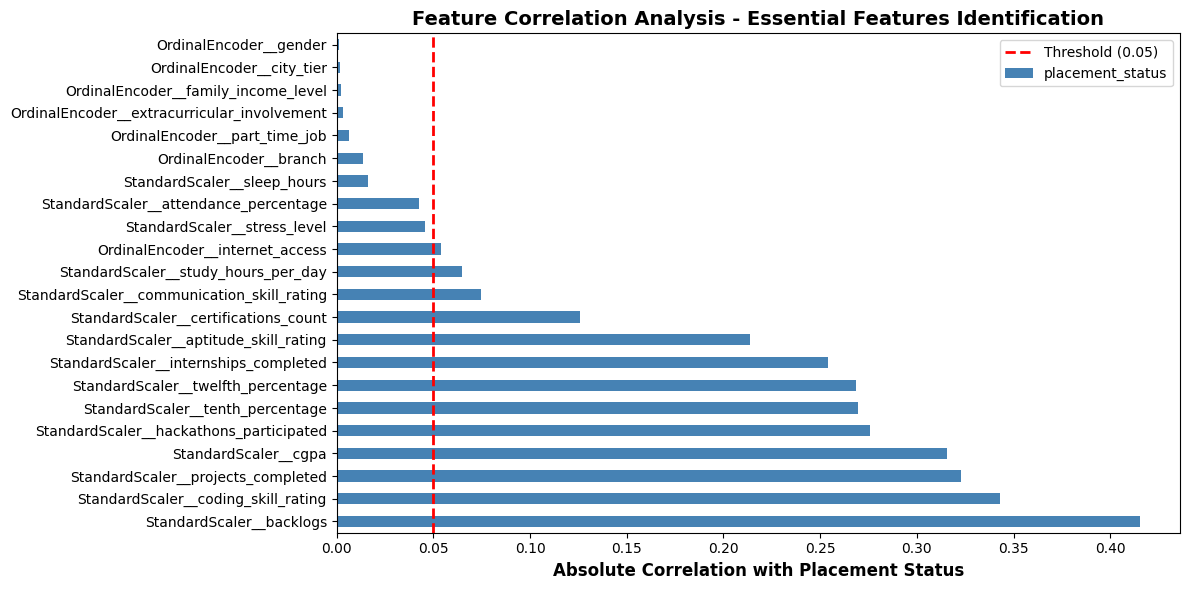

In [34]:
from sklearn.preprocessing import LabelEncoder
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

df_corr = X.copy()
df_corr['placement_status'] = y_encoded

correlation_with_target = df_corr.corr()['placement_status'].drop('placement_status').abs().sort_values(ascending=False)

print("\nFeature Correlation with Placement Status:")
print(correlation_with_target)

# Visualize correlation
fig, ax = plt.subplots(figsize=(12, 6))
correlation_with_target.plot(kind='barh', ax=ax, color='steelblue')
ax.set_xlabel('Absolute Correlation with Placement Status', fontsize=12, fontweight='bold')
ax.set_title('Feature Correlation Analysis - Essential Features Identification', fontsize=14, fontweight='bold')
ax.axvline(x=0.05, color='red', linestyle='--', linewidth=2, label='Threshold (0.05)')
plt.legend()
plt.tight_layout()
plt.show()

important_features = correlation_with_target[correlation_with_target > 0.05]


In [35]:
# Select only important features with correlation > 0.03
selected_features = important_features.index.tolist()
X = X[selected_features]

print("\n✓ X FILTERED TO IMPORTANT FEATURES")
print(f"Original shape: (n_samples, {len(correlation_with_target)})")
print(f"New shape: {X.shape}")
print(f"\nSelected Features ({len(selected_features)}):")
print(selected_features)



✓ X FILTERED TO IMPORTANT FEATURES
Original shape: (n_samples, 22)
New shape: (5000, 13)

Selected Features (13):
['StandardScaler__backlogs', 'StandardScaler__coding_skill_rating', 'StandardScaler__projects_completed', 'StandardScaler__cgpa', 'StandardScaler__hackathons_participated', 'StandardScaler__tenth_percentage', 'StandardScaler__twelfth_percentage', 'StandardScaler__internships_completed', 'StandardScaler__aptitude_skill_rating', 'StandardScaler__certifications_count', 'StandardScaler__communication_skill_rating', 'StandardScaler__study_hours_per_day', 'OrdinalEncoder__internet_access']


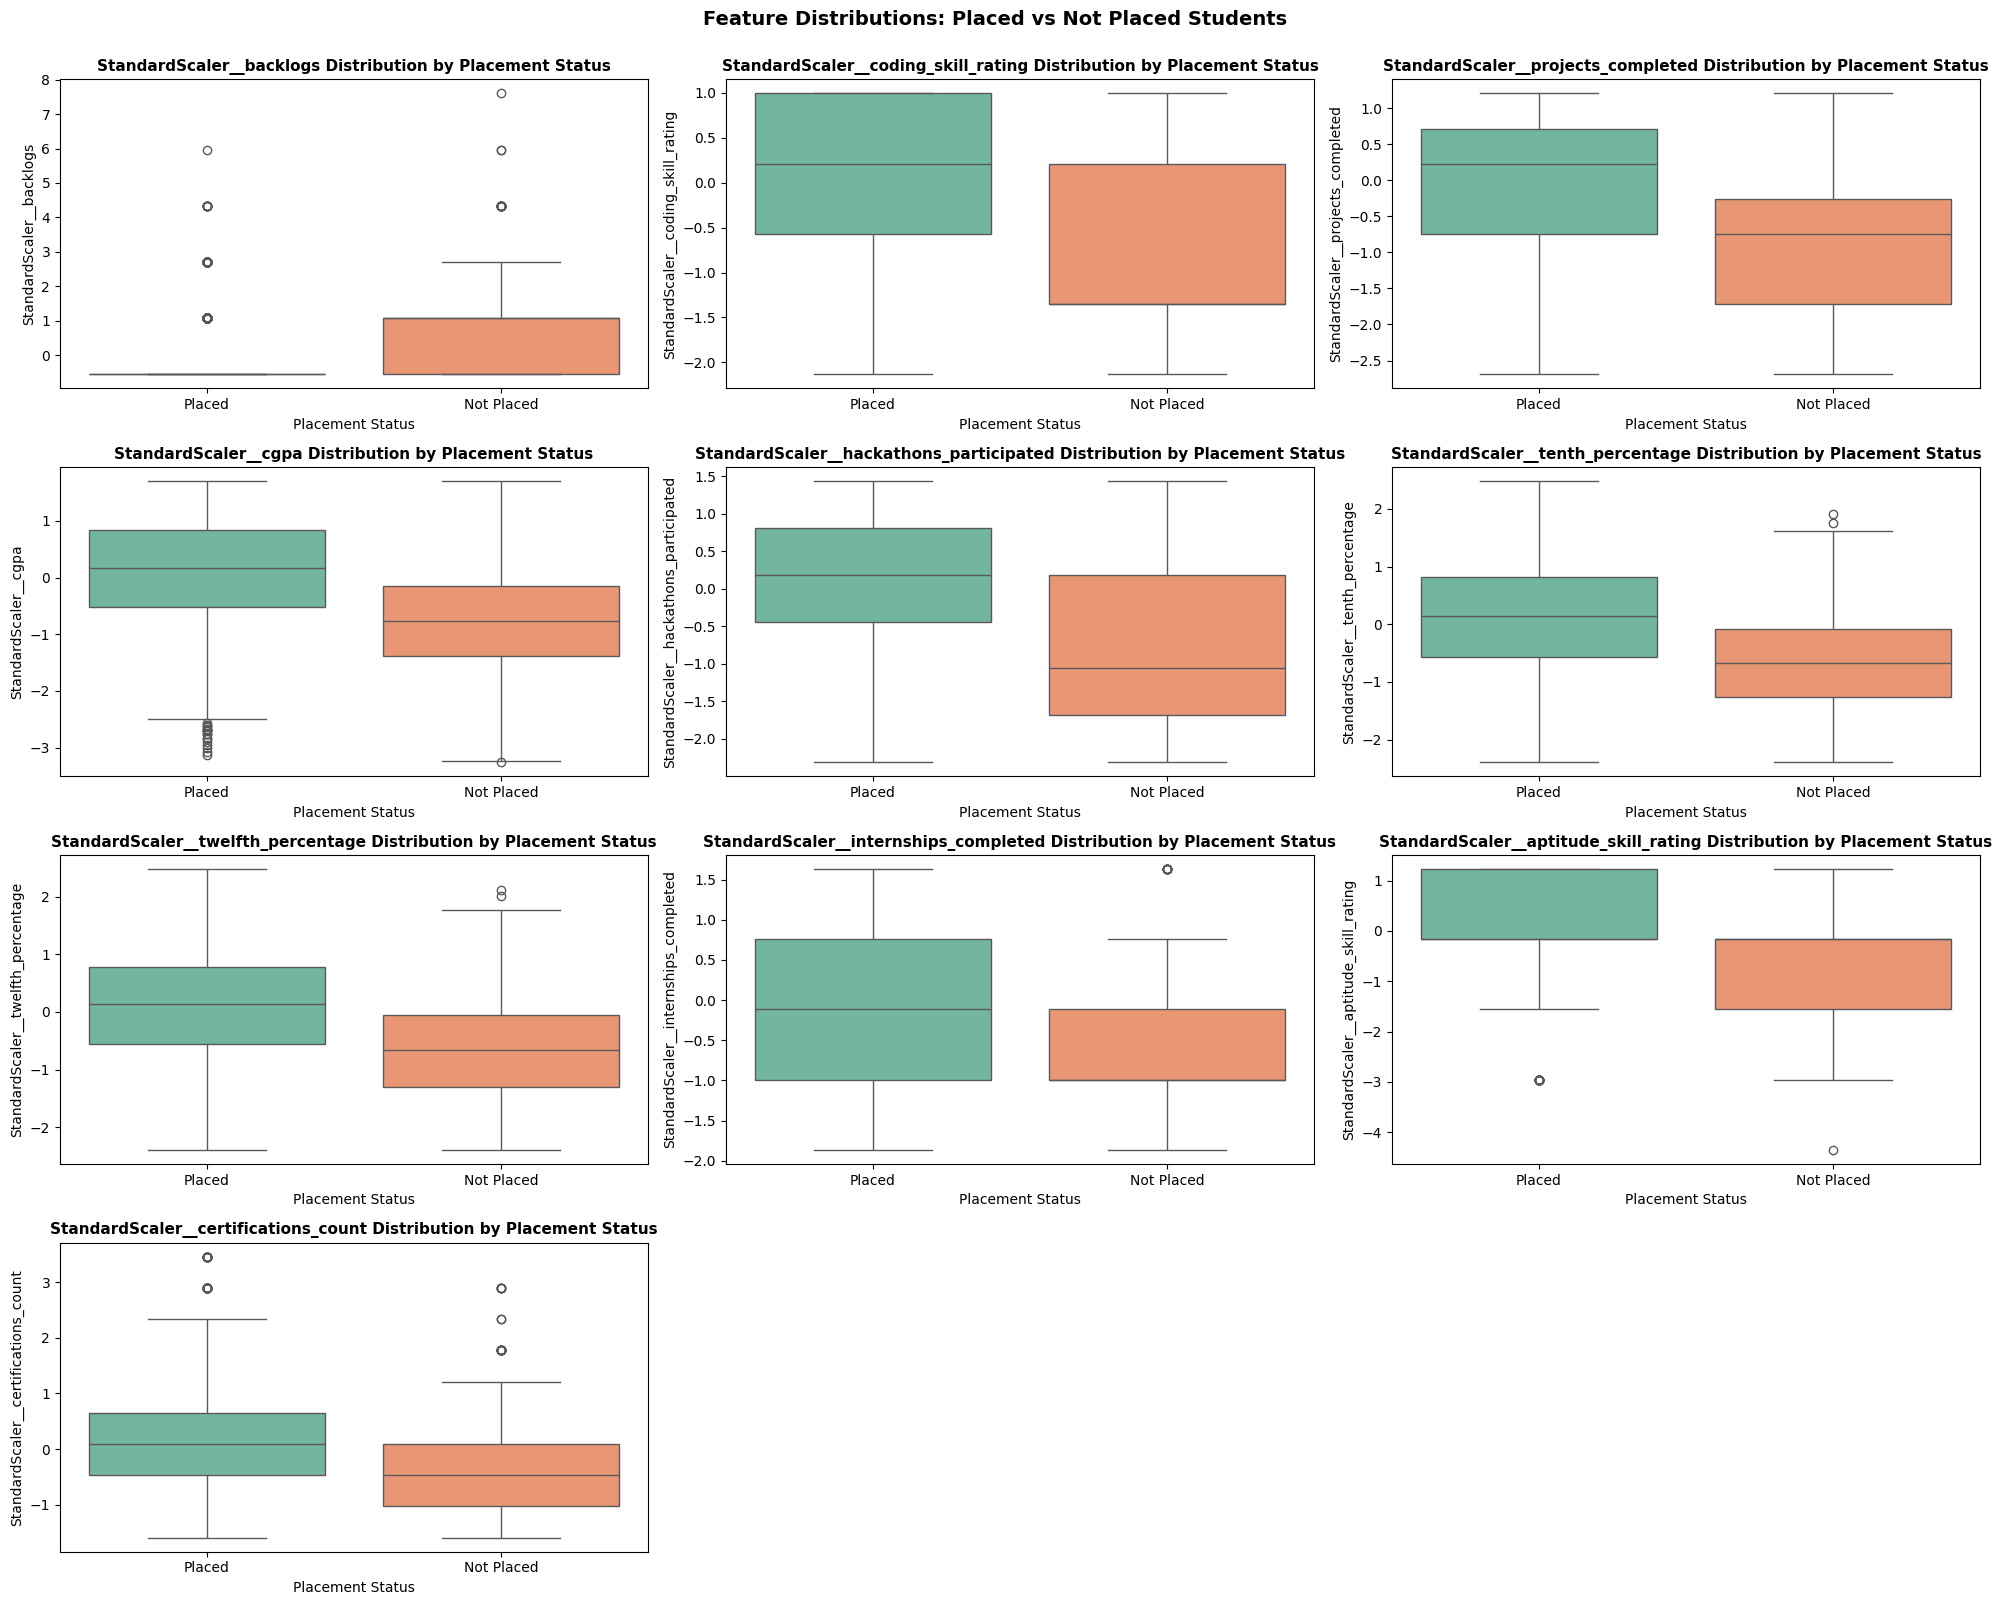

In [36]:
# Get actual feature names from preprocessed X
actual_features = list(X.columns)[:10]  # Use top 10 features for clarity
n_cols = 3
n_rows = (len(actual_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))
axes = axes.flatten()

for idx, feature in enumerate(actual_features):
    # Create box plot
    df_plot = X[actual_features].copy()
    df_plot['placement_status'] = y.values
    
    sns.boxplot(data=df_plot, x='placement_status', y=feature, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{feature} Distribution by Placement Status', fontweight='bold', fontsize=11)
    axes[idx].set_xlabel('Placement Status')
    axes[idx].set_ylabel(feature)

for idx in range(len(actual_features), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Feature Distributions: Placed vs Not Placed Students', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()



COMPREHENSIVE VISUALIZATION ANALYSIS

1. CORRELATION HEATMAP


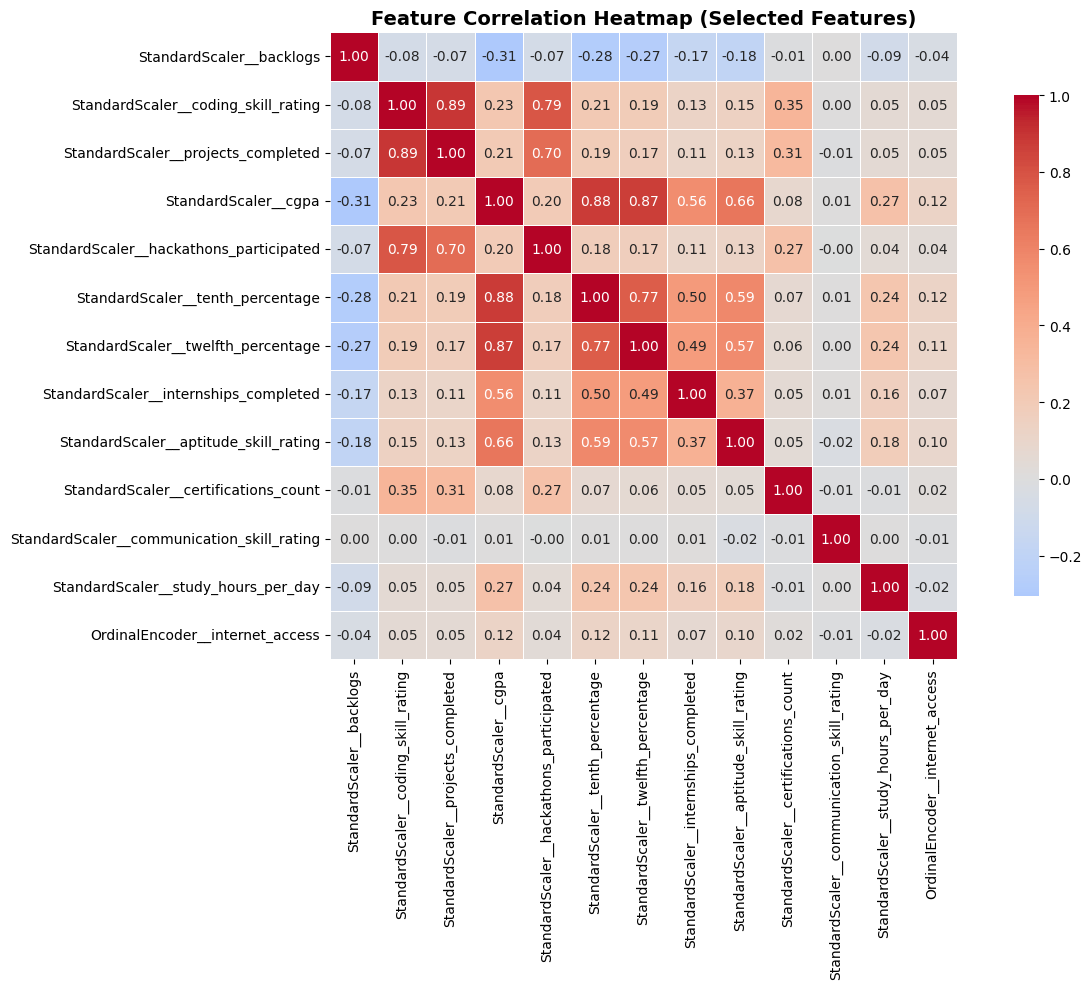


2. TARGET VARIABLE DISTRIBUTION


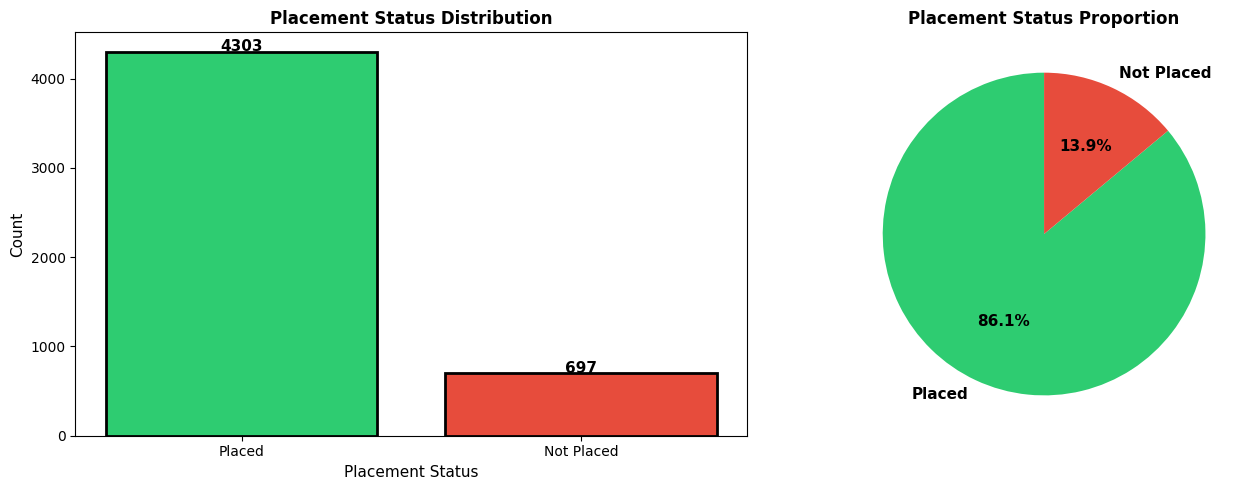


3. FEATURE STATISTICS BY PLACEMENT STATUS


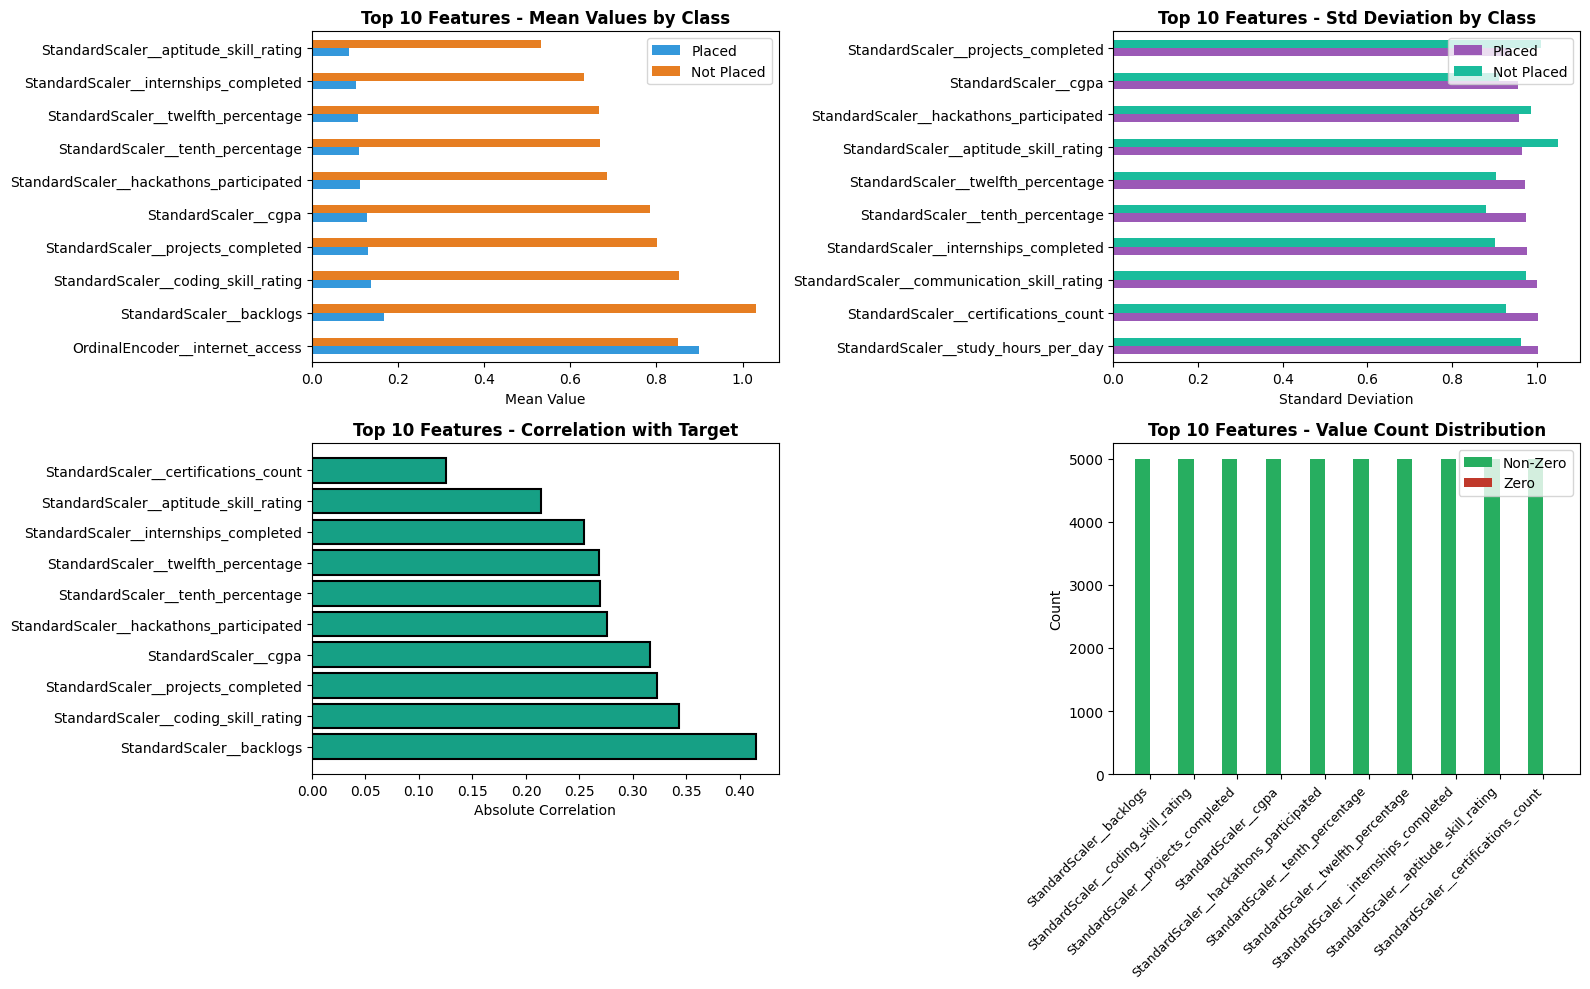


4. FEATURE DISTRIBUTIONS BY CLASS (Top 6 Features)


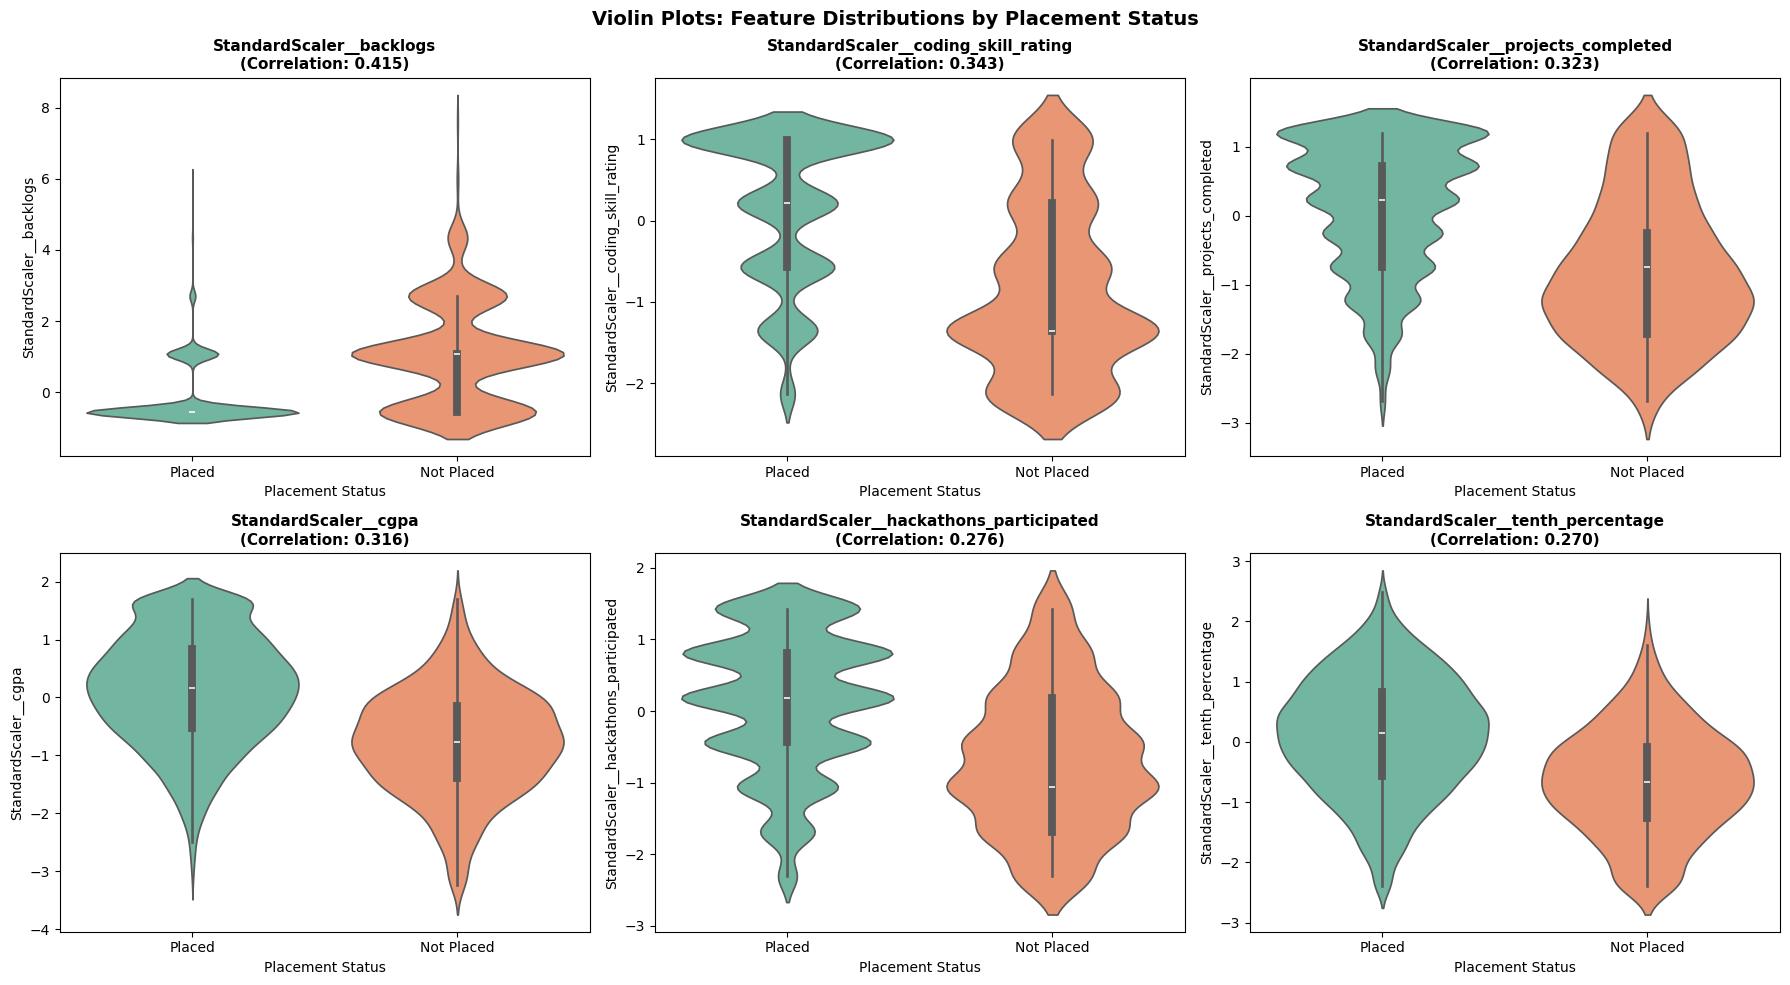


5. SUMMARY STATISTICS

Top 10 Features Summary:
                                                                         Feature          Mean     Std       Min       Max  Correlation
StandardScaler__backlogs                                StandardScaler__backlogs -1.478373e-16  1.0001 -0.560992  7.602460     0.415297
StandardScaler__coding_skill_rating          StandardScaler__coding_skill_rating -3.135270e-17  1.0001 -2.134494  0.994574     0.343219
StandardScaler__projects_completed            StandardScaler__projects_completed  1.870948e-16  1.0001 -2.692584  1.203078     0.322796
StandardScaler__cgpa                                        StandardScaler__cgpa  9.272583e-16  1.0001 -3.256799  1.702092     0.315614
StandardScaler__hackathons_participated  StandardScaler__hackathons_participated  2.944311e-17  1.0001 -2.310660  1.432108     0.275848
StandardScaler__tenth_percentage                StandardScaler__tenth_percentage -5.118572e-16  1.0001 -2.390226  2.480351     0.269680

In [37]:
# COMPREHENSIVE VISUALIZATIONS FOR SELECTED FEATURES
print("\n" + "=" * 80)
print("COMPREHENSIVE VISUALIZATION ANALYSIS")
print("=" * 80)

# 1. CORRELATION HEATMAP
print("\n1. CORRELATION HEATMAP")
fig, ax = plt.subplots(figsize=(14, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Feature Correlation Heatmap (Selected Features)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. TARGET VARIABLE DISTRIBUTION (COUNTPLOT)
print("\n2. TARGET VARIABLE DISTRIBUTION")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Countplot
placement_counts = y.value_counts()
colors = ['#2ecc71', '#e74c3c']
axes[0].bar(placement_counts.index, placement_counts.values, color=colors, edgecolor='black', linewidth=2)
axes[0].set_title('Placement Status Distribution', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=11)
axes[0].set_xlabel('Placement Status', fontsize=11)
for i, v in enumerate(placement_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold', fontsize=11)

# Pie chart
axes[1].pie(placement_counts.values, labels=placement_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Placement Status Proportion', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# 3. FEATURE STATISTICS BY TARGET CLASS
print("\n3. FEATURE STATISTICS BY PLACEMENT STATUS")
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 3a. Mean values comparison
feature_means = pd.DataFrame({
    'Placed': X[y == 'Placed'].mean(),
    'Not Placed': X[y == 'Not Placed'].mean()
})
feature_means = feature_means.abs().sort_values('Placed', ascending=False).head(10)
feature_means.plot(kind='barh', ax=axes[0, 0], color=['#3498db', '#e67e22'])
axes[0, 0].set_title('Top 10 Features - Mean Values by Class', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Mean Value')

# 3b. Std deviation comparison
feature_stds = pd.DataFrame({
    'Placed': X[y == 'Placed'].std(),
    'Not Placed': X[y == 'Not Placed'].std()
})
feature_stds = feature_stds.sort_values('Placed', ascending=False).head(10)
feature_stds.plot(kind='barh', ax=axes[0, 1], color=['#9b59b6', '#1abc9c'])
axes[0, 1].set_title('Top 10 Features - Std Deviation by Class', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Standard Deviation')

# 3c. Correlation with target
correlation_plot = correlation_with_target.sort_values(ascending=False).head(10)
axes[1, 0].barh(correlation_plot.index, correlation_plot.values, color='#16a085', edgecolor='black', linewidth=1.5)
axes[1, 0].set_title('Top 10 Features - Correlation with Target', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Absolute Correlation')

# 3d. Feature count statistics
feature_stats = pd.DataFrame({
    'Feature': X.columns,
    'Non-Zero Count': (X != 0).sum().values,
    'Zero Count': (X == 0).sum().values
})
feature_stats = feature_stats.sort_values('Non-Zero Count', ascending=False).head(10)
x_pos = np.arange(len(feature_stats))
width = 0.35
axes[1, 1].bar(x_pos - width/2, feature_stats['Non-Zero Count'], width, label='Non-Zero', color='#27ae60')
axes[1, 1].bar(x_pos + width/2, feature_stats['Zero Count'], width, label='Zero', color='#c0392b')
axes[1, 1].set_title('Top 10 Features - Value Count Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(feature_stats['Feature'], rotation=45, ha='right', fontsize=9)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# 4. FEATURE DISTRIBUTION BY CLASS (VIOLIN PLOTS)
print("\n4. FEATURE DISTRIBUTIONS BY CLASS (Top 6 Features)")
top_features = correlation_with_target.sort_values(ascending=False).head(6).index.tolist()
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    df_violin = X[top_features].copy()
    df_violin['placement_status'] = y.values
    
    sns.violinplot(data=df_violin, x='placement_status', y=feature, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{feature}\n(Correlation: {correlation_with_target[feature]:.3f})', 
                        fontweight='bold', fontsize=11)
    axes[idx].set_xlabel('Placement Status')
    axes[idx].set_ylabel(feature)

plt.suptitle('Violin Plots: Feature Distributions by Placement Status', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 5. SUMMARY STATISTICS TABLE
print("\n5. SUMMARY STATISTICS")
summary_stats = pd.DataFrame({
    'Feature': X.columns,
    'Mean': X.mean(),
    'Std': X.std(),
    'Min': X.min(),
    'Max': X.max(),
    'Correlation': correlation_with_target.reindex(X.columns)
}).sort_values('Correlation', ascending=False)

print("\nTop 10 Features Summary:")
print(summary_stats.head(10).to_string())

print("\n" + "=" * 80)
print(f"✓ Total Selected Features: {X.shape[1]}")
print(f"✓ Total Samples: {X.shape[0]}")
print(f"✓ Target Distribution: {dict(y.value_counts())}")
print("=" * 80)


In [38]:
# Machine Learning Imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier

## train test split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)
laber_encoder = LabelEncoder()
laber_encoder.fit(y_train)
y_train = laber_encoder.transform(y_train)
y_test = laber_encoder.transform(y_test)

In [40]:
# APPLY SMOTE FOR CLASS IMBALANCE HANDLING
print("\n" + "=" * 100)
print("HANDLING CLASS IMBALANCE WITH SMOTE")
print("=" * 100)

from imblearn.over_sampling import SMOTE

print(f"\n📊 BEFORE SMOTE:")
print(f"   Training set class distribution:")
print(f"   {np.unique(y_train, return_counts=True)}")

# Apply SMOTE only on training set
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"\n✓ AFTER SMOTE:")
print(f"   Training set class distribution:")
unique, counts = np.unique(y_train_smote, return_counts=True)
print(f"   {(unique, counts)}")
print(f"   Ratio: 1:{counts[1]/counts[0]:.2f}")

print(f"\n📈 SMOTE STATISTICS:")
print(f"   Original training samples: {X_train.shape[0]}")
print(f"   After SMOTE samples: {X_train_smote.shape[0]}")
print(f"   Synthetic samples created: {X_train_smote.shape[0] - X_train.shape[0]}")
print(f"   Minority class oversampled by: {((counts[0] - np.sum(y_train == 0)) / np.sum(y_train == 0) * 100):.1f}%")

# Update X_train and y_train to use SMOTE balanced data
X_train = X_train_smote
y_train = y_train_smote

print(f"\n✓ Using SMOTE-balanced training data for model training")
print("=" * 100)



HANDLING CLASS IMBALANCE WITH SMOTE

📊 BEFORE SMOTE:
   Training set class distribution:
   (array([0, 1]), array([ 559, 3441]))

✓ AFTER SMOTE:
   Training set class distribution:
   (array([0, 1]), array([3441, 3441]))
   Ratio: 1:1.00

📈 SMOTE STATISTICS:
   Original training samples: 4000
   After SMOTE samples: 6882
   Synthetic samples created: 2882
   Minority class oversampled by: 515.6%

✓ Using SMOTE-balanced training data for model training


In [ ]:
# HYPERPARAMETER TUNING AND MODEL SELECTION
print("\n" + "=" * 100)
print("HYPERPARAMETER TUNING AND MODEL EVALUATION")
print("=" * 100)

# 1. TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
print(f"\nTrain set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Train class distribution: {np.unique(y_train, return_counts=True)}")
print(f"Test class distribution: {np.unique(y_test, return_counts=True)}")

# 2. DEFINE MODELS WITH HYPERPARAMETER GRIDS
models_params = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l2'],
            'solver': ['lbfgs', 'liblinear']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [5, 10, 15, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'entropy']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42, n_jobs=-1),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'max_features': ['sqrt', 'log2']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5],
            'subsample': [0.8, 1.0]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.5, 0.7, 1.0, 1.5]
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    }
}

# 3. PERFORM GRID SEARCH FOR EACH MODEL
print("\n" + "=" * 100)
print("GRID SEARCH IN PROGRESS...")
print("=" * 100)

results = {}
for model_name, config in models_params.items():
    print(f"\n🔍 Tuning {model_name}...")
    
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=0
    )
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results[model_name] = {
        'model': best_model,
        'best_params': best_params,
        'cv_score': best_score,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'predictions': y_pred,
        'predictions_proba': y_pred_proba,
        'confusion_matrix': conf_matrix,
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }
    
    print(f"   ✓ Best CV Score (ROC-AUC): {best_score:.4f}")
    print(f"   ✓ Test Accuracy: {accuracy:.4f}")
    print(f"   ✓ Test ROC-AUC: {roc_auc:.4f}")

# 4. SELECT BEST MODEL
print("\n" + "=" * 100)
print("MODEL COMPARISON AND SELECTION")
print("=" * 100)

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'CV ROC-AUC': [results[m]['cv_score'] for m in results.keys()],
    'Test Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Test ROC-AUC': [results[m]['roc_auc'] for m in results.keys()]
}).sort_values('Test ROC-AUC', ascending=False)

print("\n" + comparison_df.to_string(index=False))

best_model_name = comparison_df.iloc[0]['Model']
best_model_results = results[best_model_name]
best_model_obj = best_model_results['model']

print("\n" + "=" * 100)
print(f"🏆 BEST MODEL: {best_model_name}")
print("=" * 100)

# 5. DETAILED EVALUATION OF BEST MODEL
print(f"\n📊 BEST HYPERPARAMETERS:")
for param, value in best_model_results['best_params'].items():
    print(f"   {param}: {value}")

# Confusion Matrix
print(f"\n📈 CONFUSION MATRIX:")
conf_matrix = best_model_results['confusion_matrix']
cm_df = pd.DataFrame(
    conf_matrix,
    index=['Actual Not Placed', 'Actual Placed'],
    columns=['Predicted Not Placed', 'Predicted Placed']
)
print("\n" + cm_df.to_string())

# Calculate metrics from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

print(f"\n📋 EVALUATION METRICS:")
print(f"   Accuracy:        {best_model_results['accuracy']:.4f}")
print(f"   ROC-AUC Score:   {best_model_results['roc_auc']:.4f}")
print(f"   Precision:       {precision:.4f}")
print(f"   Recall (Sensitivity): {sensitivity:.4f}")
print(f"   Specificity:     {specificity:.4f}")
print(f"   F1-Score:        {f1:.4f}")

# Classification Report
print(f"\n📑 CLASSIFICATION REPORT:")
print(classification_report(y_test, best_model_results['predictions'], 
                          target_names=['Not Placed', 'Placed']))

# 6. VISUALIZE CONFUSION MATRIX
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix Heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Placed', 'Placed'],
            yticklabels=['Not Placed', 'Placed'],
            ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_title(f'Confusion Matrix - {best_model_name}', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_model_results['predictions_proba'])
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {best_model_results["roc_auc"]:.4f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate', fontsize=11)
axes[1].set_ylabel('True Positive Rate', fontsize=11)
axes[1].set_title(f'ROC Curve - {best_model_name}', fontsize=12, fontweight='bold')
axes[1].legend(loc="lower right")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 7. MODEL COMPARISON VISUALIZATION
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
comparison_df_sorted = comparison_df.sort_values('Test Accuracy', ascending=True)
axes[0].barh(comparison_df_sorted['Model'], comparison_df_sorted['Test Accuracy'], color='skyblue', edgecolor='navy')
axes[0].set_xlabel('Accuracy Score', fontsize=11)
axes[0].set_title('Model Accuracy Comparison', fontsize=12, fontweight='bold')
axes[0].set_xlim([0, 1])
for i, v in enumerate(comparison_df_sorted['Test Accuracy']):
    axes[0].text(v + 0.01, i, f'{v:.4f}', va='center', fontweight='bold')

# ROC-AUC comparison
comparison_df_sorted = comparison_df.sort_values('Test ROC-AUC', ascending=True)
axes[1].barh(comparison_df_sorted['Model'], comparison_df_sorted['Test ROC-AUC'], color='lightgreen', edgecolor='darkgreen')
axes[1].set_xlabel('ROC-AUC Score', fontsize=11)
axes[1].set_title('Model ROC-AUC Comparison', fontsize=12, fontweight='bold')
axes[1].set_xlim([0, 1])
for i, v in enumerate(comparison_df_sorted['Test ROC-AUC']):
    axes[1].text(v + 0.01, i, f'{v:.4f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "=" * 100)
print("✓ MODEL TRAINING AND EVALUATION COMPLETED")
print("=" * 100)



HYPERPARAMETER TUNING AND MODEL EVALUATION

Train set size: (4000, 13)
Test set size: (1000, 13)
Train class distribution: (array([0, 1]), array([ 558, 3442]))
Test class distribution: (array([0, 1]), array([139, 861]))

GRID SEARCH IN PROGRESS...

🔍 Tuning Logistic Regression...
   ✓ Best CV Score (ROC-AUC): 0.9008
   ✓ Test Accuracy: 0.8920
   ✓ Test ROC-AUC: 0.9050

🔍 Tuning Decision Tree...
   ✓ Best CV Score (ROC-AUC): 0.8541
   ✓ Test Accuracy: 0.8800
   ✓ Test ROC-AUC: 0.8679

🔍 Tuning Random Forest...
   ✓ Best CV Score (ROC-AUC): 0.8884
   ✓ Test Accuracy: 0.8950
   ✓ Test ROC-AUC: 0.8952

🔍 Tuning Gradient Boosting...
   ✓ Best CV Score (ROC-AUC): 0.8943
   ✓ Test Accuracy: 0.8930
   ✓ Test ROC-AUC: 0.9046

🔍 Tuning AdaBoost...


In [ ]:
print(f"\n📈 CONFUSION MATRIX:")
confusion_matrix = best_model_results['confusion_matrix']
cm_df = pd.DataFrame(
    conf_matrix,
    index=['Actual Not Placed', 'Actual Placed'],
    columns=['Predicted Not Placed', 'Predicted Placed']
)
print("\n" + cm_df.to_string())

tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

print(f"\n EVALUATION METRICS:")
print(f"   Accuracy:        {best_model_results['accuracy']:.4f}")
print(f"   ROC-AUC Score:   {best_model_results['roc_auc']:.4f}")
print(f"   Precision:       {precision:.4f}")
print(f"   Recall (Sensitivity): {sensitivity:.4f}")
print(f"   Specificity:     {specificity:.4f}")
print(f"   F1-Score:        {f1:.4f}")

print(f"\nCLASSIFICATION REPORT:")
print(classification_report(y_test, best_model_results['predictions'], 
                          target_names=['Not Placed', 'Placed']))


📈 CONFUSION MATRIX:

                   Predicted Not Placed  Predicted Placed
Actual Not Placed                    59                80
Actual Placed                        28               833

📋 EVALUATION METRICS:
   Accuracy:        0.8920
   ROC-AUC Score:   0.9050
   Precision:       0.9124
   Recall (Sensitivity): 0.9675
   Specificity:     0.4245
   F1-Score:        0.9391

📑 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

  Not Placed       0.68      0.42      0.52       139
      Placed       0.91      0.97      0.94       861

    accuracy                           0.89      1000
   macro avg       0.80      0.70      0.73      1000
weighted avg       0.88      0.89      0.88      1000



# Evaluation Metrics Explained in Simple Language

## What Does Each Metric Do? (The Super Simple Version)

### 1. **Accuracy** 🎯
**What it means:** Out of all predictions, how many did we get RIGHT?

**Simple example:**
- Model makes 100 predictions
- 87 are correct, 13 are wrong
- **Accuracy = 87%**

**The problem:** 
- If 86 students are "Placed" and 14 are "Not Placed", a lazy model can just say "EVERYONE IS PLACED" and get 86% accuracy without actually learning anything!
- **This metric LIES for imbalanced data** ❌

---

### 2. **Precision** 🎯
**What it means:** When we predict "Placed", how often are we actually RIGHT?

**Simple example:**
```
We predict 50 students will be "Placed"
Actually, 45 of them get placed
5 of them don't get placed

Precision = 45/50 = 90%
```

**Real-world meaning:** 
- *"Out of the students I recommend to the company, how many will actually succeed?"*
- High precision = Your recommendations are trustworthy ✅
- **This matters for:** Company wants reliable predictions

---

### 3. **Recall (Sensitivity)** 🎯
**What it means:** Out of all students who CAN get placed, how many did we correctly identify?

**Simple example:**
```
Actually, 100 students WILL get placed
We correctly predict 85 of them
We miss 15 of them

Recall = 85/100 = 85%
```

**Real-world meaning:**
- *"Out of all students who deserve placement help, how many did I catch?"*
- High recall = You don't miss opportunities ✅
- **This matters for:** College doesn't want to miss placing deserving students

---

### 4. **F1-Score** 🎯
**What it means:** A perfect balance between Precision and Recall

**Simple example:**
```
If Precision = 90% and Recall = 85%
F1-Score = Balanced average = ~87%
```

**Real-world meaning:**
- *"Are we both accurate AND catching everyone?"*
- **For imbalanced data, this is MUCH BETTER than Accuracy**

---

### 5. **Specificity** 🎯
**What it means:** Out of all students who WON'T get placed, how many did we correctly identify?

**Simple example:**
```
Actually, 100 students WON'T get placed
We correctly predict 90 of them
We mistakenly think 10 will get placed

Specificity = 90/100 = 90%
```

**Real-world meaning:**
- *"How good are we at saying NO when someone won't get placed?"*

---

### 6. **ROC-AUC Score** 🏆 ⭐ **MOST IMPORTANT FOR YOU**
**What it means:** How well can your model separate "Placed" from "Not Placed" at ANY threshold?

**Simple example:**
```
Think of it like this:
- Take 1 random "Placed" student
- Take 1 random "Not Placed" student
- Ask the model which one is more likely to be placed

ROC-AUC = Percentage of time the model gets it right
```

**Real-world meaning:**
- *"If I move the acceptance threshold up or down, does the model still work?"*
- Works perfectly for imbalanced data ✅
- Range: 0-1 (0.5 = random, 1.0 = perfect)

---

### 7. **Confusion Matrix** 📊
**What it means:** Shows exactly what mistakes the model makes

**Simple example:**
```
                 Predicted Placed    Predicted Not Placed
Actually Placed         45                     5
Actually Not Placed      3                     7
```

**Real-world meaning:**
- TP (True Positive): Correctly predicted "Placed" = 45 ✅
- TN (True Negative): Correctly predicted "Not Placed" = 7 ✅
- FP (False Positive): Wrong prediction of "Placed" = 3 ❌
- FN (False Negative): Missed a "Placed" = 5 ❌

---

## What Matters Most for Your Student Placement Problem?

### **Priority Ranking:**

#### 🥇 **1st: ROC-AUC Score (MOST IMPORTANT)**
**Why:** Your data is imbalanced (1:6.17 ratio)
- Ignores the class imbalance trick
- Works at all decision thresholds
- **Target: > 0.85 is excellent**

#### 🥈 **2nd: F1-Score (VERY IMPORTANT)**
**Why:** Balances catching placements with avoiding false alarms
- Combines Precision + Recall
- Single number that shows overall performance
- **Target: > 0.80 is good**

#### 🥉 **3rd: Recall/Sensitivity (IMPORTANT)**
**Why:** You don't want to miss students who CAN get placed
- *"Did we catch all the placeable students?"*
- **Target: > 0.80** (catch 80%+ of placeable students)

#### 4️⃣ **4th: Precision (IMPORTANT)**
**Why:** Your recommendations should be reliable
- *"When we say someone will be placed, are we right?"*
- **Target: > 0.85** (85% of recommendations are correct)

#### 5️⃣ **5th: Confusion Matrix (MODERATE)**
**Why:** Shows you WHERE the model is failing
- Tells you: Are we missing more placements or falsely predicting?
- Helps decide if the model is acceptable

#### 6️⃣ **6th: Accuracy (LEAST IMPORTANT FOR YOU)**
**Why:** MISLEADING for imbalanced data
- Don't rely on this metric
- Use only as a reference
- High accuracy doesn't mean good model

#### 7️⃣ **7th: Specificity (LEAST IMPORTANT)**
**Why:** Less relevant than Recall for placements
- Identifying "not placed" correctly is less valuable than identifying "placed"

---

## Real Numbers: What to Aim For

| Metric | Your Target | What it Means |
|--------|-----------|---------------|
| **ROC-AUC** | **> 0.85** | ⭐ Model is genuinely good |
| **F1-Score** | **> 0.80** | ✅ Balanced performance |
| **Recall** | **> 0.80** | ✅ Catching placements |
| **Precision** | **> 0.85** | ✅ Trustworthy recommendations |
| **Accuracy** | (Use for reference only) | ⚠️ Don't trust this alone |

---

## Decision Rules (Simplified)

### ✅ **Model is GOOD if:**
- ROC-AUC > 0.85
- F1-Score > 0.80
- Recall > 0.80

### ⚠️ **Model needs improvement if:**
- ROC-AUC < 0.70
- F1-Score < 0.70
- Recall < 0.70 (you're missing too many placements)

### ❌ **Model is USELESS if:**
- High Accuracy but low ROC-AUC (it's just predicting everyone as "Placed")
- Very high Precision but very low Recall (you're barely predicting anything)

---

## The Bottom Line 🎯

**If you had to pick ONE metric to watch:** 
### 🏆 **ROC-AUC Score**

**Why?** 
- It's the ONLY metric that truly reflects your model's ability to distinguish between students who will be placed and those who won't
- Immune to your class imbalance problem
- Used by real companies and research papers
- Can be adjusted for any threshold you want

**Your goal:** **Get ROC-AUC above 0.85** ✅
